<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignement:-ANALYZING-CHICAGO-CRIME-DATA" data-toc-modified-id="Assignement:-ANALYZING-CHICAGO-CRIME-DATA-1">Assignement: ANALYZING CHICAGO CRIME DATA</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Reading-and-Transforming-the-dataset" data-toc-modified-id="Reading-and-Transforming-the-dataset-1.0.1">Reading and Transforming the dataset</a></span></li></ul></li><li><span><a href="#Seasonality-of-crimes-per-month" data-toc-modified-id="Seasonality-of-crimes-per-month-1.1">Seasonality of crimes per month</a></span></li><li><span><a href="#Trends-throughout-the-Day" data-toc-modified-id="Trends-throughout-the-Day-1.2">Trends throughout the Day</a></span></li><li><span><a href="#Map-Graph" data-toc-modified-id="Map-Graph-1.3">Map Graph</a></span></li></ul></li></ul></div>

# Practical Data Science
## Assignement: ANALYZING CHICAGO CRIME DATA


Dataset: [Chicago Crimes - 2001 to present](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data)

Packages Used:
- Numpy
- Pandas
- Matplotlib
- Seaborn
- Folium

Running Time: around 30 minutes

In [2]:
#importing the packages that will be used

import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import folium

%matplotlib inline

<div class="alert alert-block alert-info">
<b>Note:</b> <br>
Throughout the notebook there are some valid commands that are commented out. These are actions that were used, but are unecessary for the final output of the notebook. Thus; they are left in place solely for your information. <br>
</div>

# ETL process



#### Reading and Transforming the dataset


In [3]:
#-- setting the datapath
datapath = "C:/Users/akaplanis/Downloads/Crimes_-_2001_to_present.csv"

#-- see a preview of the data and the field types
#dataview = pd.read_csv(datapath, sep = ',', nrows = 5)

#dataview

#dataview.dtypes

data = pd.read_csv(datapath, sep = ',', parse_dates= ['Date'])

#-- change the following fields to type string
data[['ID','Beat','District', 'Ward', 'Community Area']] = data[['ID','Beat','District', 'Ward', 'Community Area']].astype('str')

#data.dtypes
#data.columns

#-- handling the unwanted spaces in the column names
data.columns =data.columns.str.strip().str.replace(' ', '')

#-- rename fields for easier use
data = data.rename(index=str, columns=
              {'CaseNumber': 'CaseNo', 
               'Description': 'Desc',
               'PrimaryType': 'PType',
               'Location_Description':'LocationDesc',
               'Community_Area': 'Community',
               'XCoordinate': 'XCo',
               'YCoordinate':'YCo', 
               'UpdatedOn': 'UpDate', 
               'Latitude': 'Lat',
               'Longitude': 'Lon'})

#-- adding some new fields
data['Month']= pd.DatetimeIndex(data['Date']).month
data['Day']= pd.DatetimeIndex(data['Date']).day
data['Hour']= pd.DatetimeIndex(data['Date']).hour




***

In [4]:
data.groupby('PType')['ID'].count().sort_values(ascending = False)

#-- 1. Fix the values NON - CRIMINAL, NON-CRIMINAL and NON-CRIMINAL (SUBJECT SPECIFIED) to be viewd as one
#-- 2. Domestic violation has only one record which must be an error.

#data['PType'].unique()

#data['Desc'].unique()

#-- Fixes the issue with the values
data.loc[data['PType'] == 'NON - CRIMINAL', 'PType'] = 'NON-CRIMINAL'

#-- Fixes the issue with the values
data.loc[data['PType'] == 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'PType'] = 'NON-CRIMINAL'

#-- Investigate the domestic violence issue
domestic = data.loc[data['Desc' ].str.contains('^DOM')]

domestic_group = domestic.groupby(['PType','Desc'])['ID']

#domestic_group.count()

#domestic.count()

In [5]:
#-- subset of the initial dataset
sbdata = data[(data['Year'] ==2001) |
              (data['Year'] ==2004) | 
              (data['Year'] ==2007) |
              (data['Year'] ==2010) | 
              (data['Year'] ==2013)|
              (data['Year'] ==2016)]

# Trends in Crime Data

A visual presentation of the amount of crimes reveals that:
    
- The plethora of crimes revolves around less serious offenses such as theft and battery.
- Homicide has relatively few records which is expected. For such cases, as stated in the description of the dataset, there are data per victim which is obviously undisclosed information.
- Moreover, via the pie-chart, we can see a steady decline to the amount of crimes through the years, which is most probably due to the increased security measures after 9/11.

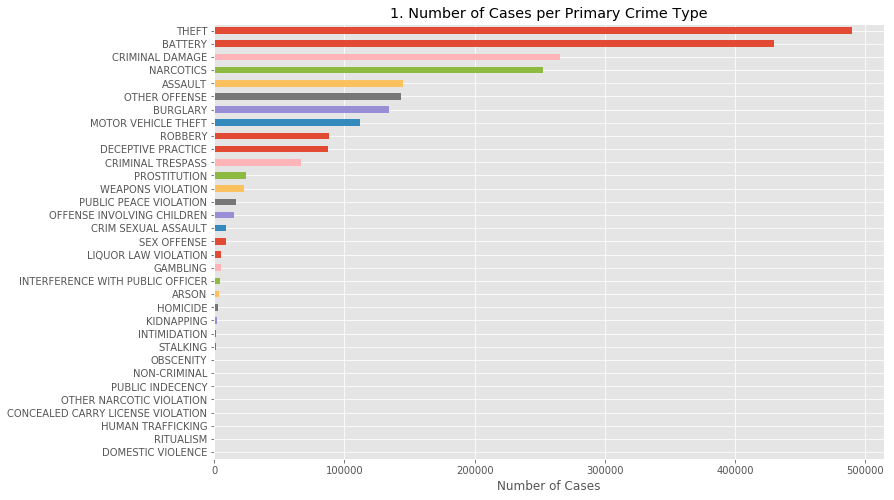

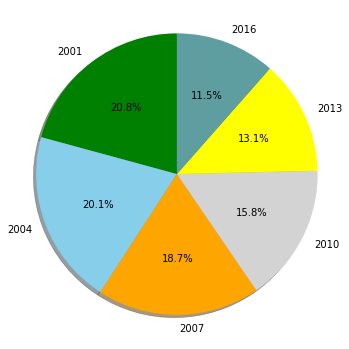

In [6]:
#-- create a subset for the pie-chart
pies = sbdata.groupby('Year')['ID'].count().reset_index(name = 'count')

#-- create the bar chart
a = plt.figure(figsize= (12,8))
plt.style.use('ggplot')

sbdata.groupby('PType')['ID'].count().sort_values().plot(kind='barh',title = '1. Number of Cases per Primary Crime Type').set(xlabel="Number of Cases", ylabel="")

#-- create the pie chart
b, ax8 = plt.subplots(figsize= (5,5))

ax8.pie(pies['count'], labels=pies.Year, colors=['green','skyblue','orange','lightgrey','yellow', 'cadetblue'], autopct='%1.1f%%',
        shadow=True, startangle=90)


ax8.axis('equal')
plt.tight_layout()
plt.show()



***
### Seasonality of crimes per month

The linecharts show a common pattern among all 6 years.
- There is a decline in the number of crimes from January to February with the latter having the least amount of cases annually. 
- From February onwards there is a rapid incline to the amount of crimes being committed with a distinct peak around March.
- The incline continues and reaches the highest peak during summer, with July and August competing chest-to-chest.
- Then the amount of crimes shows a decline shortly and quickly inclines back to another peak on October.
- From October till December there is a decline.

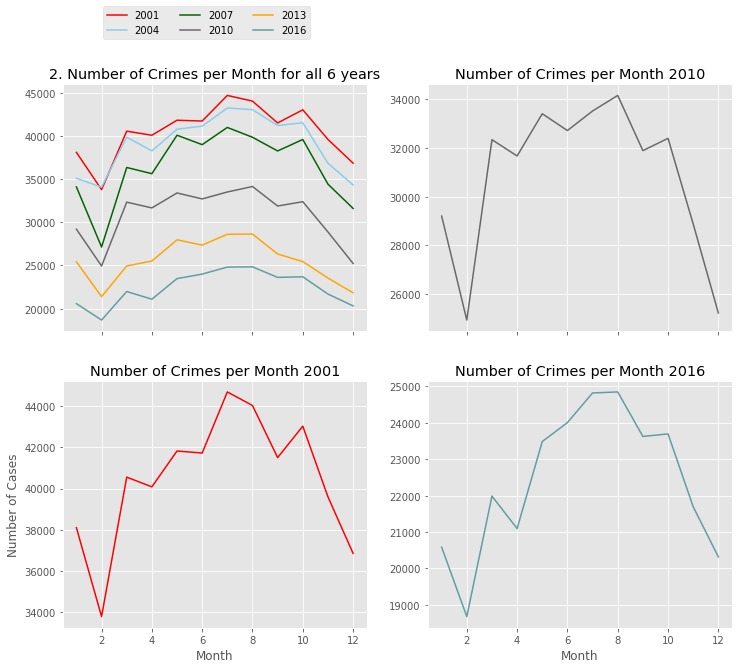

In [7]:
#-- create 3 random subsets out of the 6
s2001 = data[data['Year'] == 2001]
s2010 = data[data['Year'] == 2010]
s2016 = data[data['Year'] == 2016]


#-- create the line-graph
c, ax1 = plt.subplots(nrows=2, ncols=2, figsize= (12,10), sharex=True)
plt.style.use('seaborn-deep')


sbdata.groupby(['Month','Year']).count()['ID'].unstack().plot(kind = 'line',title = '2. Number of Crimes per Month for all 6 years',color=['red', 'skyblue', 'darkgreen','dimgrey','orange','cadetblue'], ax=ax1[0,0]).legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3,borderaxespad=4)
s2001.groupby('Month')['ID'].count().plot(kind = 'line',title = 'Number of Crimes per Month 2001',color='red', ax=ax1[1,0]).set(ylabel="Number of Cases", xlabel="Month")
s2010.groupby('Month')['ID'].count().plot(kind = 'line',title = 'Number of Crimes per Month 2010',color ='dimgrey', ax=ax1[0,1]).set(xlabel="")
s2016.groupby('Month')['ID'].count().plot(kind = 'line',title = 'Number of Crimes per Month 2016',color= 'cadetblue', ax=ax1[1,1]).set(xlabel="Month")
plt.show()



***
Although the graph below contains all the available information, it is rather noisy.<br> As a result, for the duration of the analysis we will only use the first 24 most frequent types of crime, <br>giving more attention to those with more than 10k records.

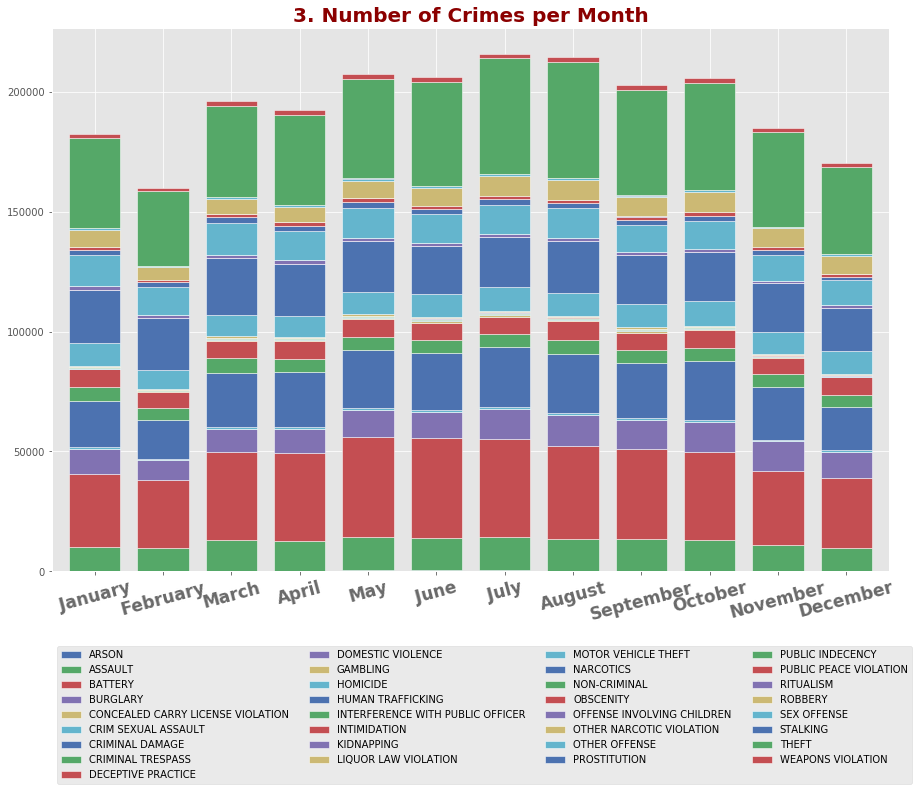

In [8]:
#-- create the labels for the x-axis
MonthNames = ['January', 'February', 'March','April', 'May','June','July','August','September','October','November','December']

#-- crate a stacked bar plot
l, ax7 = plt.subplots(figsize = (15,10))

sbdata.groupby(['Month','PType'])['ID'].count().unstack().plot(kind = 'bar',ax= ax7,stacked = True,edgecolor='white',width =0.75, legend=False)
plt.title("3. Number of Crimes per Month",fontsize=20,fontweight ='bold', color= 'darkred')
plt.xlabel('')
plt.xticks(np.arange(len(MonthNames)), MonthNames, color='dimgrey', rotation=15, fontweight='bold', fontsize='17', horizontalalignment='center')
plt.legend(bbox_to_anchor=(0., -0.4, 1., 1), loc=3, ncol=4)
plt.show()

In [9]:
#-- view the frequency of crimes
#sbdata.groupby('PType')['ID'].count().sort_values(ascending =False)


Comparing the three sets 4a, 4b with  graph 2; it can easily be inferred that the spikes in crimes throughout the year are mostly due to the four most frequent types of crime. <br>
More in detail, battery and theft related crimes are responsible for the large incline shown in the linecharts during the summer. <br>
<br>

The rest types of crime, not only do they have a small amount of records, they are also spread relatively uniformely throught the year, so they are of minor interest.<br>

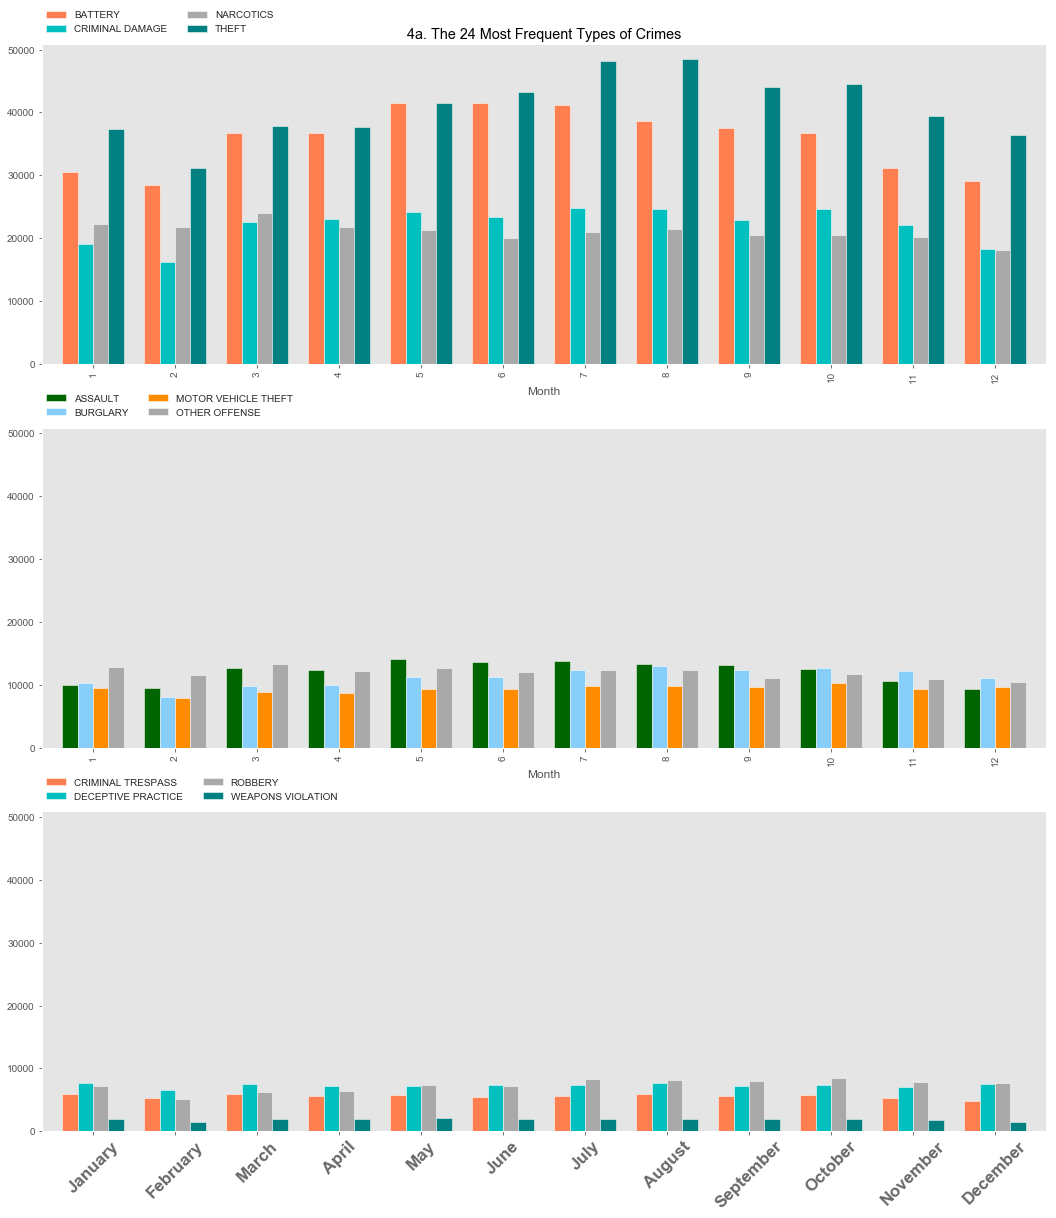

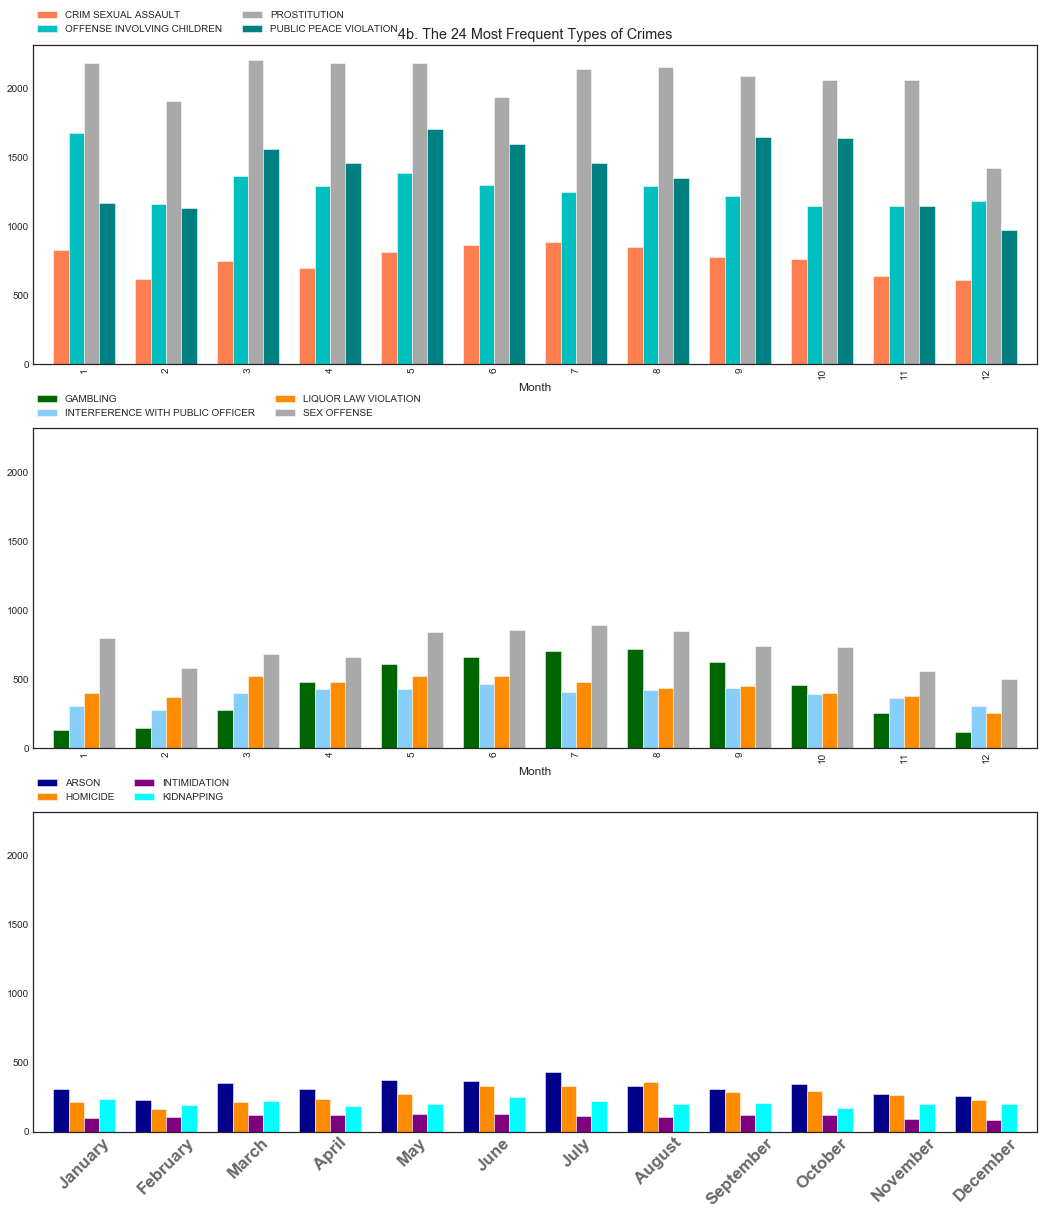

In [10]:
#-- Create three different barplots for the 12 most frequent types of crimes.

d, ax2 = plt.subplots(nrows =3,figsize= (18,20),sharey=True)
#-- 1st barplot
plt.style.use('seaborn-white')
sbdata.loc[(sbdata['PType'] =='THEFT') | 
           (sbdata['PType'] =='BATTERY') | 
           (sbdata['PType'] =='CRIMINAL DAMAGE') | 
           (sbdata['PType'] =='NARCOTICS')].groupby(['Month','PType'])['ID'].count().unstack().plot(kind = 'bar',color = ['coral','c', 'darkgrey','teal'],edgecolor='white',width =0.75, ax=ax2[0], alpha =1, legend=True,title = "4a. The 24 Most Frequent Types of Crimes").legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2,borderaxespad=0.)
#-- 2nd barplot
sbdata.loc[(sbdata['PType'] =='OTHER OFFENSE') | 
           (sbdata['PType'] =='ASSAULT') | 
           (sbdata['PType'] =='BURGLARY') | 
           (sbdata['PType'] =='MOTOR VEHICLE THEFT')].groupby(['Month','PType'])['ID'].count().unstack().plot(kind = 'bar',color = ['darkgreen','lightskyblue', 'darkorange','darkgray'],edgecolor='white',width =0.75, ax=ax2[1], alpha =1, legend=True).legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2,borderaxespad=0.)
#-- 3rd barplot
sbdata.loc[(sbdata['PType'] =='DECEPTIVE PRACTICE') | 
           (sbdata['PType'] =='ROBBERY') | 
           (sbdata['PType'] =='CRIMINAL TRESPASS') | 
           (sbdata['PType'] =='WEAPONS VIOLATION')].groupby(['Month','PType'])['ID'].count().unstack().plot(kind = 'bar',color = ['coral','c', 'darkgrey','teal'],edgecolor='white',width =0.75, ax=ax2[2], alpha =1, legend=True).legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2,borderaxespad=0.)

plt.xlabel('')
plt.xticks(np.arange(len(MonthNames)), MonthNames, color='dimgrey', rotation=45, fontweight='bold', fontsize='17', horizontalalignment='center')



#-- NEXT PLOT
#-- Create three different barplots for the next 12 most frequent types of crimes.
MonthNames = ['January', 'February', 'March','April', 'May','June','July','August','September','October','November','December']


e, ax3 = plt.subplots(nrows =3,figsize= (18,20),sharey=True)
#-- 4th barplot
plt.style.use('seaborn-white')
sbdata.loc[(sbdata['PType'] =='PROSTITUTION') | 
           (sbdata['PType'] =='PUBLIC PEACE VIOLATION') | 
           (sbdata['PType'] =='OFFENSE INVOLVING CHILDREN') | 
           (sbdata['PType'] =='CRIM SEXUAL ASSAULT')].groupby(['Month','PType'])['ID'].count().unstack().plot(kind = 'bar',color = ['coral','c', 'darkgrey','teal'],edgecolor='white',width =0.75, ax=ax3[0], alpha =1, legend=True,title = "4b. The 24 Most Frequent Types of Crimes").legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2,borderaxespad=0.)
#-- 5th barplot
sbdata.loc[(sbdata['PType'] =='SEX OFFENSE') | 
           (sbdata['PType'] =='INTERFERENCE WITH PUBLIC OFFICER') | 
           (sbdata['PType'] =='GAMBLING') | 
           (sbdata['PType'] =='LIQUOR LAW VIOLATION')].groupby(['Month','PType'])['ID'].count().unstack().plot(kind = 'bar',color = ['darkgreen','lightskyblue', 'darkorange','darkgray'],edgecolor='white',width =0.75, ax=ax3[1], alpha =1, legend=True).legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2,borderaxespad=0.)
#-- 6th barplot
sbdata.loc[(sbdata['PType'] =='ARSON') | 
           (sbdata['PType'] =='HOMICIDE') | 
           (sbdata['PType'] =='KIDNAPPING') | 
           (sbdata['PType'] =='INTIMIDATION')].groupby(['Month','PType'])['ID'].count().unstack().plot(kind = 'bar',color = ['darkblue', 'darkorange', 'purple','aqua'],edgecolor='white',width =0.75, ax=ax3[2], alpha =1, legend=True).legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2,borderaxespad=0.)

plt.xlabel('')
plt.xticks(np.arange(len(MonthNames)), MonthNames, color='dimgrey', rotation=45, fontweight='bold', fontsize='17', horizontalalignment='center')

plt.show()



***

### Trends throughout the Day
<br>

__Graph 1:__ <br>
In the first graph, the most important "revelation" is that theft related crimes occur mostly during daytime hours with the most happening around noon. <br> Contrary to popular belief that such crimes happen at night, this somewhat counter-intuitive information is quite logical, considering that the peaks of such crimes are during rush hours (09, 12, 15 and 18) where pick-pockets are active the most. <br>
Furthermore, narcotics related crimes show an unexpected behavior reaching a peak from 11 to 13. <br>
<br>
__Graph 2:__ <br>
    In the second graph, we can see that burglaries occur mostly at 8 o'clock in the morning. Considering that the thieves usually spot when the victim leaves to go to work, it is expected. Moreover as the day passes, such crimes are committed less frequently. <br>
A quite peculiar outcome, is that assaults happen the most around 14:00 - 15:00, while motor thefts occur the most, as expected, in the evening. <br>
<br>
__Graph 3:__ <br>
In the third graph, we can see that robberies don't follow the same pattern as burglaries and thefts, having a stady increase of events throughout the day. <br>
On the other hand deceptive practices happen during daytime, but with two rather large peaks at 09:00 and 11:00.
<br><br>
__Graphs 4 & 5:__ <br>
In the fourth and fifth graphs,other than a high occurrence of prostitution-related cases at 07:00; the frequency of crimes is as expected. <br>
<br>
__Graph 6:__ <br>
The sixth graph, holds very interesting information about kidnappings showing that they mostly occur at 08:00 and 18:00. <br>
As it is seen in the two plots that follow graph 6, most kidnappings are children abductions and they mostly occur at 08:00, 15:00 and 16:00 or the time of day that kids come/ go to school. 

In [11]:
#-- create 6 subsets of the 24 most frequent crimes to plot per hour
s1 = sbdata.loc[(sbdata['PType'] =='THEFT') | 
           (sbdata['PType'] =='BATTERY') | 
           (sbdata['PType'] =='CRIMINAL DAMAGE') | 
           (sbdata['PType'] =='NARCOTICS')].groupby(['Hour','PType'])['ID'].count()

s2 = sbdata.loc[(sbdata['PType'] =='OTHER OFFENSE') | 
           (sbdata['PType'] =='ASSAULT') | 
           (sbdata['PType'] =='BURGLARY') | 
           (sbdata['PType'] =='MOTOR VEHICLE THEFT')].groupby(['Hour','PType'])['ID'].count()

s3 = sbdata.loc[(sbdata['PType'] =='DECEPTIVE PRACTICE') | 
           (sbdata['PType'] =='ROBBERY') | 
           (sbdata['PType'] =='CRIMINAL TRESPASS') | 
           (sbdata['PType'] =='WEAPONS VIOLATION')].groupby(['Hour','PType'])['ID'].count()

s4 = sbdata.loc[(sbdata['PType'] =='PROSTITUTION') | 
           (sbdata['PType'] =='PUBLIC PEACE VIOLATION') | 
           (sbdata['PType'] =='OFFENSE INVOLVING CHILDREN') | 
           (sbdata['PType'] =='CRIM SEXUAL ASSAULT')].groupby(['Hour','PType'])['ID'].count()

s5 = sbdata.loc[(sbdata['PType'] =='SEX OFFENSE') | 
           (sbdata['PType'] =='INTERFERENCE WITH PUBLIC OFFICER') | 
           (sbdata['PType'] =='GAMBLING') | 
           (sbdata['PType'] =='LIQUOR LAW VIOLATION')].groupby(['Hour','PType'])['ID'].count()

s6 = sbdata.loc[(sbdata['PType'] =='ARSON') | 
           (sbdata['PType'] =='HOMICIDE') | 
           (sbdata['PType'] =='KIDNAPPING') | 
           (sbdata['PType'] =='INTIMIDATION')].groupby(['Hour','PType'])['ID'].count()



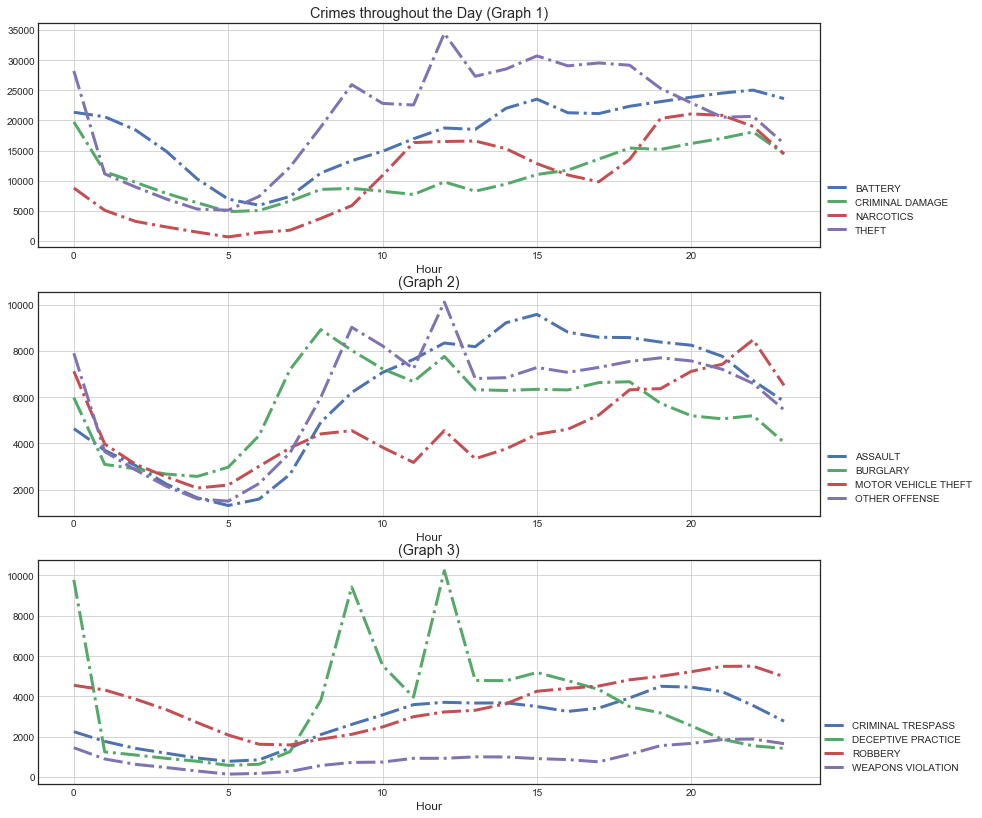

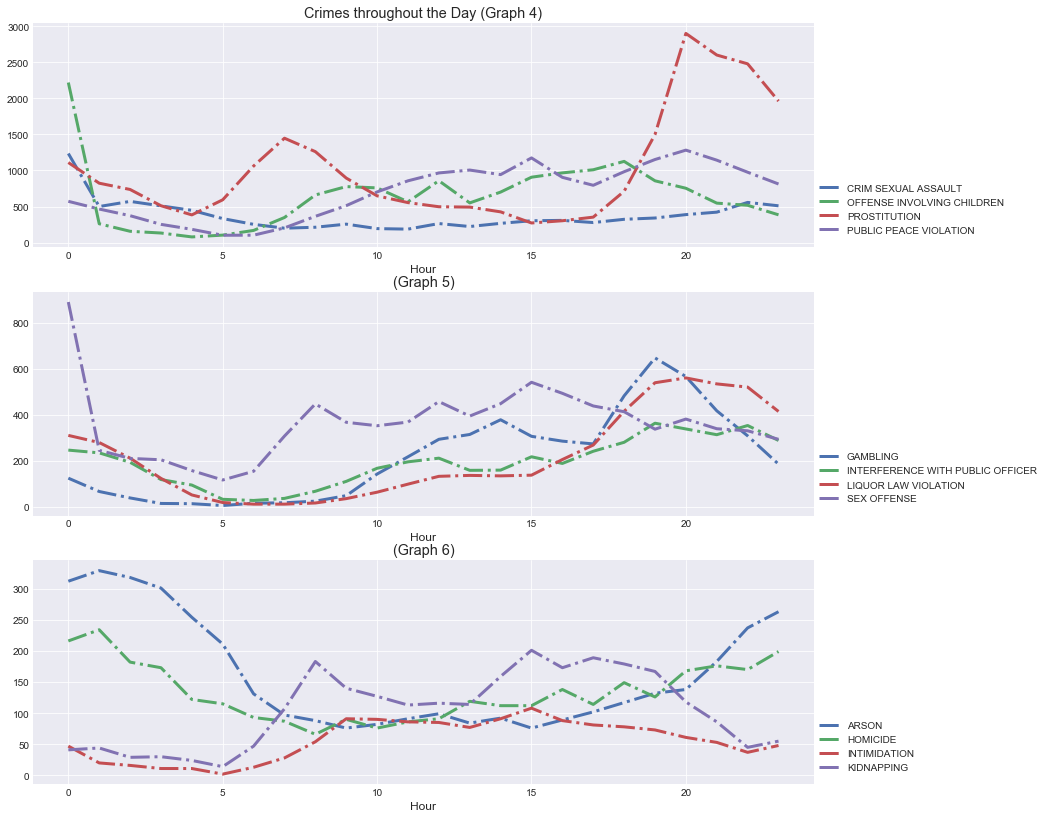

In [12]:
#-- plot the 3 of the 6 subsets created above
#-- due to too much info the graphs are split in two
f, ax4 = plt.subplots(nrows=3, figsize=(14,14))

plt.style.use('seaborn-darkgrid')

s1.unstack().plot.line(ax=ax4[0],linewidth=3, linestyle= '-.', title = 'Crimes throughout the Day (Graph 1)').legend(bbox_to_anchor=(1.2, 0.3, -0.03, 0.),ncol=1,borderaxespad=0.)

s2.unstack().plot.line(ax=ax4[1],linewidth=3, linestyle= '-.', title = '(Graph 2)').legend(bbox_to_anchor=(1.23, 0.3, -0.03, 0.),ncol=1,borderaxespad=0.)

s3.unstack().plot.line(ax=ax4[2],linewidth=3, linestyle= '-.', title = '(Graph 3)').legend(bbox_to_anchor=(1.2158, 0.3, -0.03, 0.),ncol=1,borderaxespad=0.)

#plot the rest subsets
g, ax5 = plt.subplots(nrows=3, figsize=(14,14))

plt.style.use('seaborn-darkgrid')

s4.unstack().plot.line(ax=ax5[0],linewidth=3, linestyle= '-.', title = 'Crimes throughout the Day (Graph 4)').legend(bbox_to_anchor=(1.001, 0.3, -0.03, 0.),ncol=1,borderaxespad=0.)

s5.unstack().plot.line(ax=ax5[1],linewidth=3, linestyle= '-.', title = '(Graph 5)').legend(bbox_to_anchor=(1.001, 0.3, -0.03, 0.),ncol=1,borderaxespad=0.)

s6.unstack().plot.line(ax=ax5[2],linewidth=3, linestyle= '-.', title = '(Graph 6)').legend(bbox_to_anchor=(1.001, 0.3, -0.03, 0.),ncol=1,borderaxespad=0.)

plt.show()


In [13]:
#--  subset the data for kidnapping at specific points during a day
kidnapsmor= sbdata.loc[(sbdata['PType']=='KIDNAPPING') & ((sbdata['Hour']>=5) & (sbdata['Hour']<=10 ))]
kidnapseve= sbdata.loc[(sbdata['PType']=='KIDNAPPING') & ((sbdata['Hour']>=15) & (sbdata['Hour']<=19 ))]

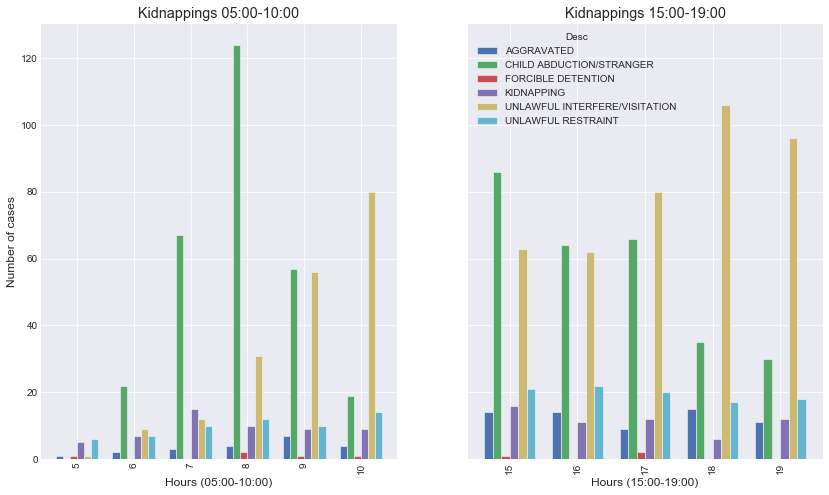

In [14]:
#-- plot the subsets of kidnaps
h, ax6 = plt.subplots(ncols =2, figsize=(14,8),sharey=True )
kidnapsmor.groupby(['Hour','Desc'])['ID'].count().unstack().plot(kind= 'bar', ax=ax6[0], legend = False, title = 'Kidnappings 05:00-10:00',edgecolor='white',width =0.75).set(ylabel= 'Number of cases', xlabel = 'Hours (05:00-10:00)')

kidnapseve.groupby(['Hour','Desc'])['ID'].count().unstack().plot(kind= 'bar', ax=ax6[1], title = 'Kidnappings 15:00-19:00',edgecolor='white',width =0.75).set( xlabel = 'Hours (15:00-19:00)')
plt.show()

***

In [15]:
#-- create the three subsets for the heatmaps
hm1= sbdata.groupby(['Month', 'PType'])['ID'].size().reset_index(name ='count')
hm2a =sbdata.loc[(sbdata['Hour'] <12)].groupby(['Hour', 'PType'])['ID'].size().reset_index(name ='count')
hm2b =sbdata.loc[(sbdata['Hour'] >=12)].groupby(['Hour', 'PType'])['ID'].size().reset_index(name ='count')

In [16]:
#-- turn the subsets to pivot tables
ptable1 = pd.pivot_table(hm1, values='count', index=['PType'],columns=['Month'], aggfunc=np.sum)
ptable2a = pd.pivot_table(hm2a, values='count', index=['PType'],columns=['Hour'], aggfunc=np.sum)
ptable2b = pd.pivot_table(hm2b, values='count', index=['PType'],columns=['Hour'], aggfunc=np.sum)


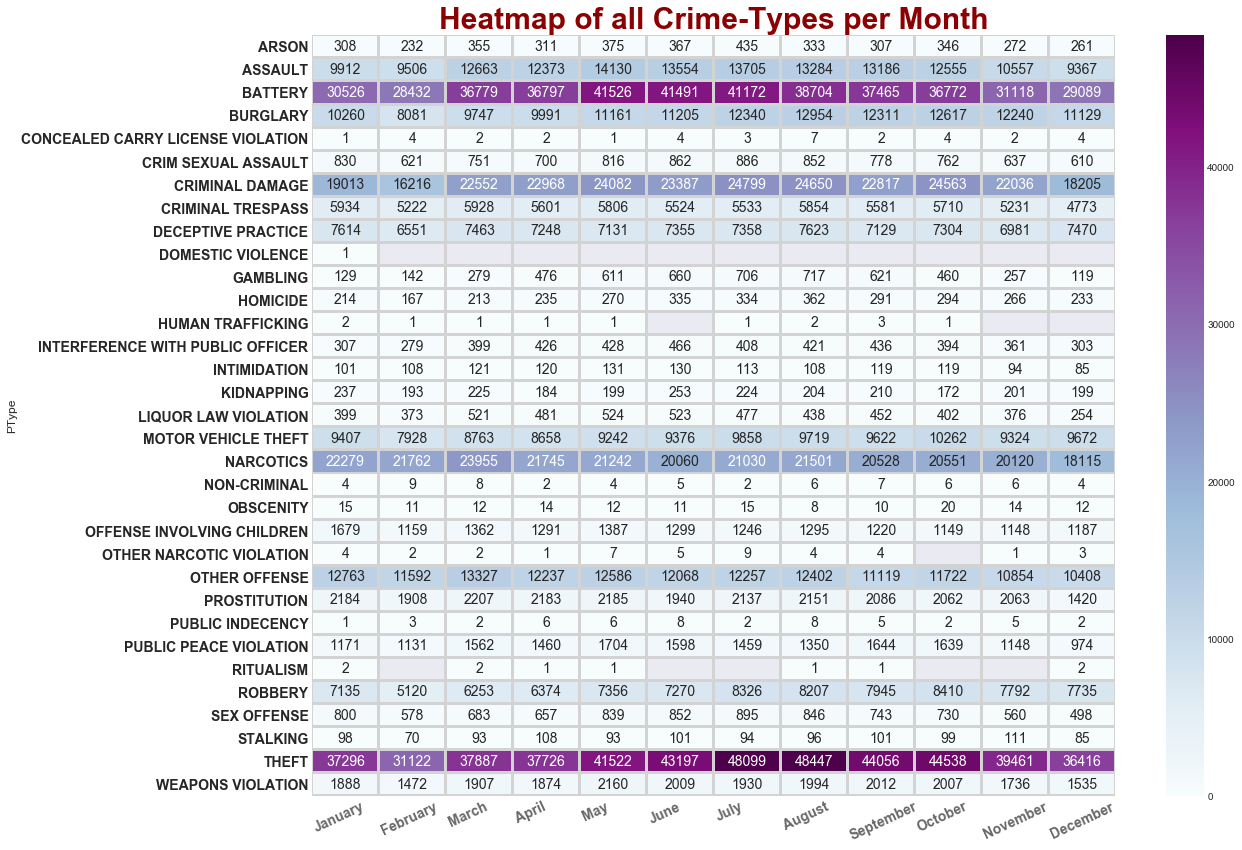

In [17]:
#-- heatmap per month
i = plt.figure(figsize=(18,14))
sns.heatmap(ptable1, annot=True, annot_kws={"size": 14}, linewidths=2, linecolor='lightgrey', fmt='g',cmap="BuPu")
plt.title('Heatmap of all Crime-Types per Month', fontsize = 30, color= 'darkred', fontweight = 'bold')
plt.xlabel('')
plt.xticks(np.arange(len(MonthNames)), MonthNames, color='dimgrey', rotation=25, fontweight='bold', fontsize='14', horizontalalignment='left')
plt.yticks( fontweight='bold', fontsize='14')
plt.show()

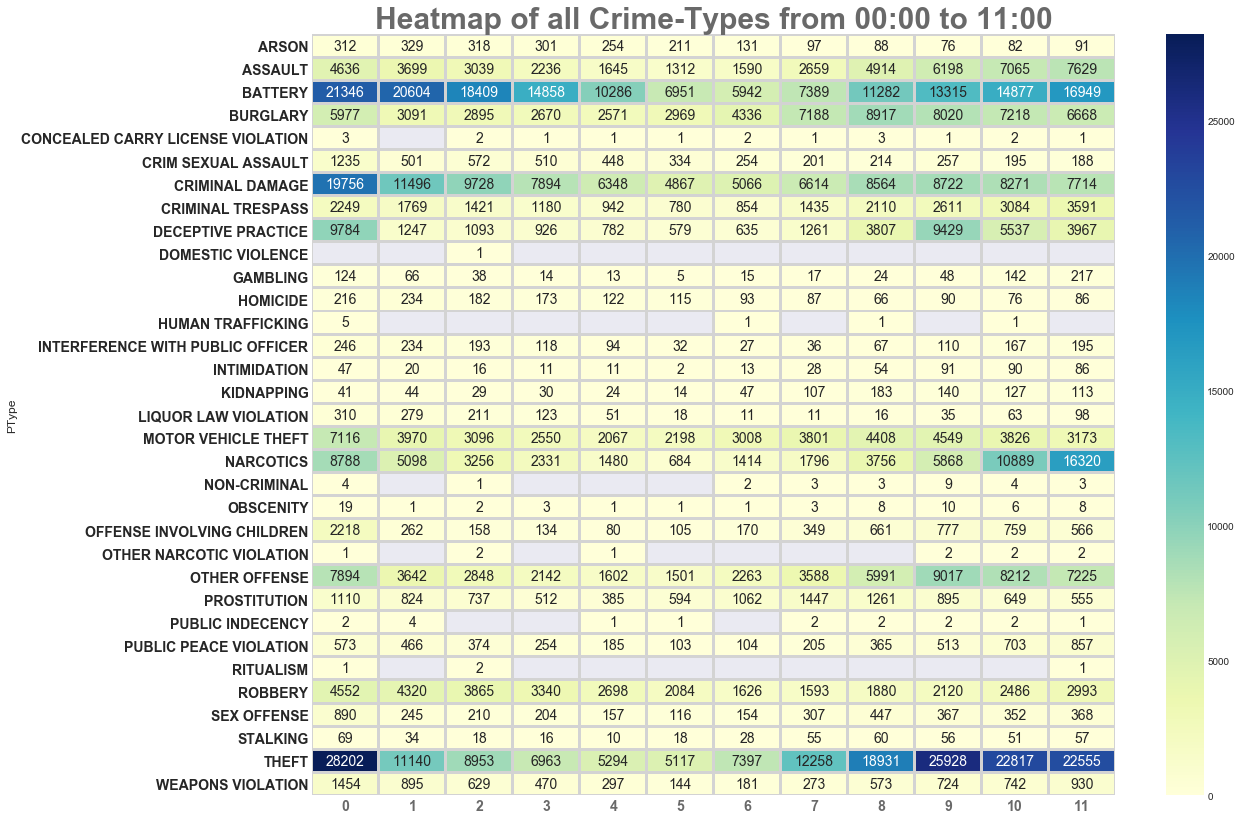

In [18]:
#-- first heatmap per hour
j = plt.figure(figsize=(18,14))
sns.heatmap(ptable2a, annot=True, annot_kws={"size": 14}, linewidths=2, linecolor='lightgrey', fmt='g',cmap="YlGnBu")
plt.title('Heatmap of all Crime-Types from 00:00 to 11:00', fontsize = 30, color= 'dimgrey', fontweight = 'bold')
plt.xlabel('')
plt.xticks(color='dimgrey', rotation=0, fontweight='bold', fontsize='14', horizontalalignment='center')
plt.yticks( fontweight='bold', fontsize='14')
plt.show()

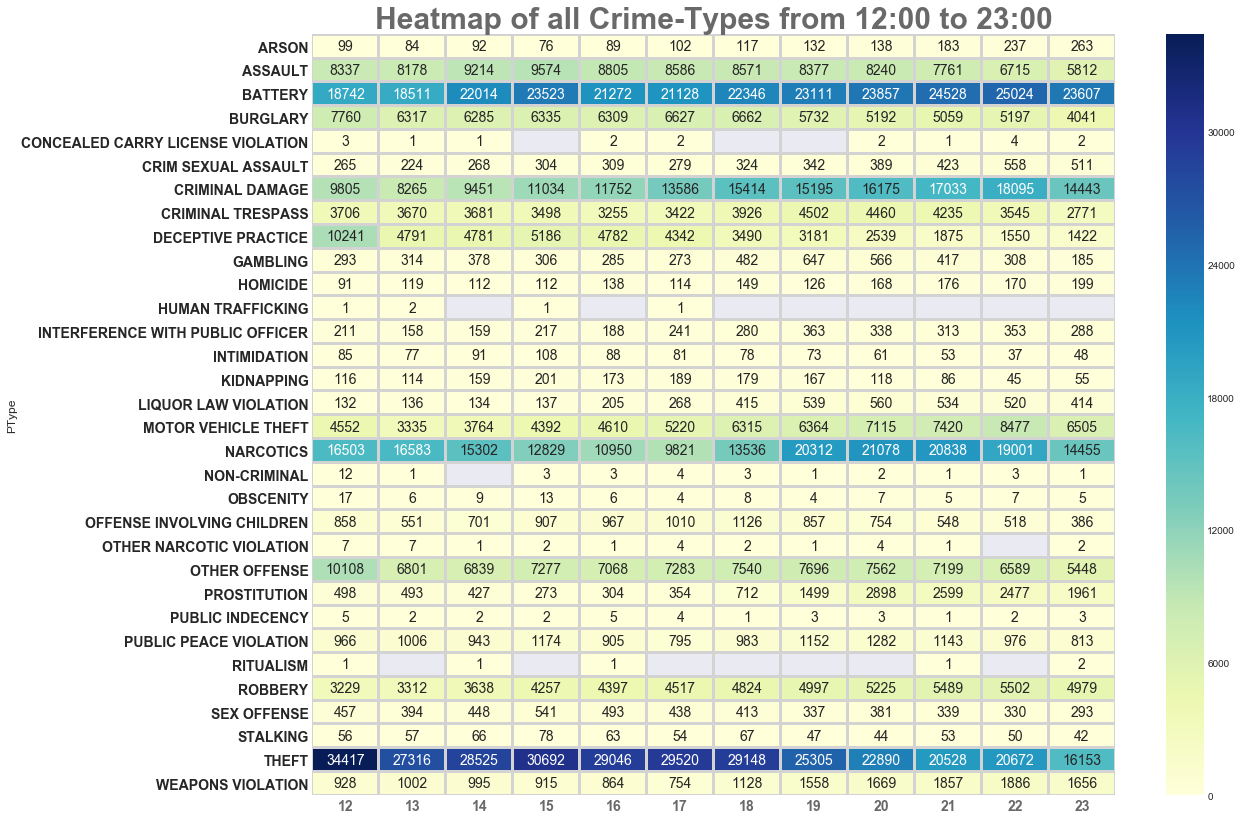

In [19]:
#-- second heatmap per hour
k =plt.figure(figsize=(18,14))
sns.heatmap(ptable2b, annot=True, annot_kws={"size": 14}, linewidths=2, linecolor='lightgrey', fmt='g',cmap="YlGnBu")
plt.title('Heatmap of all Crime-Types from 12:00 to 23:00', fontsize = 30, color= 'dimgrey', fontweight = 'bold')
plt.xlabel('')
plt.xticks(color='dimgrey', rotation=0, fontweight='bold', fontsize='14', horizontalalignment='center')
plt.yticks( fontweight='bold', fontsize='14')
plt.show()

In [20]:
#-- save the figures in pdf
with PdfPages('C:/Users/akaplanis/Desktop/MSc_Data_Science/Courses/1st_Trimester/Practical_DS/1. Assignment/crime_trends.pdf') as pdf:
    
    pdf.savefig(a, bbox_inches='tight')
    pdf.savefig(b, bbox_inches='tight')
    pdf.savefig(c, bbox_inches='tight')
    pdf.savefig(l, bbox_inches='tight')
    pdf.savefig(d, bbox_inches='tight')
    pdf.savefig(e, bbox_inches='tight')
    pdf.savefig(f, bbox_inches='tight')
    pdf.savefig(g, bbox_inches='tight')
    pdf.savefig(h, bbox_inches='tight')
    pdf.savefig(i, bbox_inches='tight')
    pdf.savefig(j, bbox_inches='tight')
    pdf.savefig(k, bbox_inches='tight')


***

### Map Graph

<br>


___Methodology___<br>

It must first be stated that I consider the wards as neighborhoods. <br>
The graph has two layers. One that shows the cases at their exact coordinate and another that holds info per ward.

1. For the first layer I calculated:
 - The number of records per ward
 - The mean and sd per ward of longitude and latitude
 <br>
Then I found a radius per record after standardizing the latitude and logitude values of each one. <br>

_This gives in essence an estimation of the area around the given coordinates where the crime was committed, since the values of lat and lon are not exact._
<br>

2. For the second layer I calculated:
 - Again the count and mean per ward.
 - And the population means and sds of the latitude and longitude
 <br>
These circles are centered around the means of lat and long of each ward. Again I found a radius, but this time it was based on the standardized values of the sample means.
<br>

_The wider the area of a ward, the more disperse are the crimes inside of it. The more narrow it is, the more centralized the area where the crimes are committed._
<br>
<br>



In [21]:
#-- create the first layer of the map. This layer is about the observations and will be derived from the sample "sbdata"

#calculate the means, stds nad count per Ward for the Latitude and Longitude
lmean1 = data.groupby('Ward')[['Lat','Lon']].mean().reset_index()
lcount1 = data.groupby('Ward')[['Lat','Lon']].count().reset_index()
lsd1 = data.groupby('Ward')[['Lat','Lon']].std().reset_index()

#merge the dataframes into one
fmaptemp1 = pd.merge(lmean1,lsd1, how='inner', on=['Ward'])

fmaptemp1 = pd.merge(fmaptemp1,lcount1, how='inner', on=['Ward'])

fmaptemp1 = fmaptemp1.rename(index=str, columns=
              {'Lat_x': 'Lat_sMean',
               'Lat_y': 'Lat_sSd',
               'Lat' : 'Lat_sCount',
               'Lon_x': 'Lon_sMean',
               'Lon_y': 'Lon_sSd',
               'Lon':'Lon_sCount'})

#left join our initial sample with the newly created dataframe
fmap1 = pd.merge(sbdata,fmaptemp1, how='left', on=['Ward'])
# drop null Lat and Lon values
fmap1 =  fmap1.dropna(subset=['Lat', 'Lon'])


#-- create the radius for each record
# Each record's lat and lon value was subtracted by it's ward's lat and lon means respectively,
#and devided by their respective sds
#This gives a very small radius but still a meaningful one

def radius(row):
    #x, y = (obs - mean_sample)/sd_sample
    
    x =  ((row['Lat']-row['Lat_sMean'])/row['Lat_sSd'])  #sMean and sSd stand for sample mean and sample sd respectively
    y =  ((row['Lon']-row['Lon_sMean'])/row['Lon_sSd'])
    
    # circle: x^2 + y^2 = r^2
    r = (x**2 + y**2)**(1/2)
    return r

#-- add the radius as field
fmap1['Radius'] = fmap1.apply(radius, axis =1)

#-- take a random sample of the observations to plot the first layer of the map
fmap1 =  fmap1.sample(frac=0.001, replace=False)

In [22]:
#-- create the second layer of the map. This layer is about the wards and will be derived from the initial data

#calculate again per ward the means and count of lat and lon
lcount2 = data.groupby('Ward')[['Lat','Lon']].count()
lmean2 = data.groupby('Ward')[['Lat','Lon']].mean()
                                                 
#calculate the population means and sds of lat and lon
poplatm = data['Lat'].mean()
poplonm = data['Lon'].mean()
poplatsd = data['Lat'].std()
poplonsd = data['Lon'].std()


#-- create the radius for each ward
#similarly as with the observations
def radius_ward(row):
    #x, y = (mean_sample - mean_pop)/sd_pop
    x =  ((row['Lat']-poplatm)/poplatsd)
    y =  ((row['Lon']-poplonm)/poplonsd)
    # circle: x^2 + y^2 = r^2
    r = (x**2 + y**2)**(1/2)
    #magnify r for better visual results
    if r<1:
        return 1*10
    else:
        return r*10

#-- add the radius of the wards as field
lmean2['Radius'] = lmean2.apply(radius_ward, axis =1)

#-- merging the subsets with 'Ward' as key

fmap2 = pd.merge(lmean2,lcount2, how='inner', on=['Ward'])

fmap2 = fmap2.rename(index=str, columns=
              {'Lat_x': 'Lat_pMean',
               'Lat_y': 'Lat_pCount',
               'Lon_x': 'Lon_pMean',
               'Lon_y': 'Lon_pCount'})

#-- classify the frequency of crimes per color
def frequency(count):
    if count['Lat_pCount'] < 100000:
        return "yellow"
    elif 100000 <= count['Lat_pCount'] < 200000:
        return "orange"
    else:
        return "red"

#add the color classification as field
fmap2['Freq']=fmap2.apply(frequency, axis =1)


#-- create the labels for the ward circle areas
def desc(des):
    if des['Lat_pCount'] < 100000:
        return "Less than 100k"
    elif 100000<=des['Lat_pCount'] < 200000:
        return "Between 100k-200k"
    else:
        return "More than 200k"

fmap2['Desc1']=fmap2.apply(desc, axis =1)

fmap2['Desc'] = 'Ward '+ fmap2.index.map(str).str.cat(fmap2['Desc1'], sep=', ')

__Interpretation:__

<br>
The blue dots indicate distinct cases. <br>
The circles indicate the different wards and the number of crimes that have been committed in each one. <br>

The wider the circle, the more dispersed are the crimes in that ward. This means, that the police units must also be dispersed, or keep a larger number of forces in that ward. <br>The narrower the circle, the more centralized are the crimes in that ward, meaning that the police will need fewer people to patrol that area. <br>
Of course, the color of the circle plays a crucial role as well.
- Yellow: less than 100k crimes
- Orange: between 100k-200k
- Red: more than 200k

<br>

So, a __wide red__ circle indicates a large dispersion and a high number of crimes, which means that the police will definetely need a larger force and more frequent patrols.<br> 
On the other hand a __narrow yellow__ circle indicates few crimes in a smaller area, which requires relatively few units. <br>
Additionaly, circles with __medium width__ will need an adequate enough force depending on the color.

In [23]:
#-- create the map
m = folium.Map(location=[41.872060,-87.628857],tiles='cartodbdark_matter', zoom_start=10.5)

#-- add the first layer of observations
for i in range(0,len(fmap1)):
  folium.Circle(   
    location=[fmap1.iloc[i]['Lat'], fmap1.iloc[i]['Lon']],
    radius=fmap1.iloc[i]['Radius'],
    color= 'cadetblue'
      
).add_to(m)

for j in range(0,len(fmap2)):
  folium.CircleMarker(
      
    location=[fmap2.iloc[j]['Lat_pMean'], fmap2.iloc[j]['Lon_pMean']],
    radius=fmap2.iloc[j]['Radius'],
    popup=fmap2.iloc[j]['Desc'],
    fill_color= fmap2.iloc[j]['Freq'],
    color= fmap2.iloc[j]['Freq'],
    fill_opacity=0.7,
    opacity = 0.6,
    fill=True,
      
).add_to(m)

m

***

__Pareto Principle:__

<br>
It states that approximately 80% of the effects are due to 20% of the causes.

In [24]:
#subset per ward and drop the NA ward
prt_total = sbdata.groupby('Ward')['ID'].count().sort_values(ascending =False)
prt_total= prt_total[1:]


In [25]:

#take the 20% of the wards with the highest crime rate 
x = int(len(prt_total)*0.2)
y =  prt_total.nlargest(x)
#count the total number of crimes
st = prt_total.sum()
#count the number of crimes in the 20% of the wards
s = y.sum()

if s/st >0.8:
    print(' In 20% of the neighborhoods with the highest crime rate, occurs in total the', int((s/st)*100), '% of crimes.\n As a result, the Pareto Principle applies to the neighborhoods')
else:
    print(' In 20% of the neighborhoods with the highest crime rate, occurs in total the', int((s/st)*100), '% of crimes.\n As a result, the Pareto Principle does not apply to the neighborhoods')

     

 In 20% of the neighborhoods with the highest crime rate, occurs in total the 35 % of crimes.
 As a result, the Pareto Principle does not apply to the neighborhoods
